CCMC scoreboard API

In [1]:
import json
import os
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

from sunpy.time import parse_time

os.system('pwd')


os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions > data/ccmc/ATSB.json')

/Users/chris/python/heliocats


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4303k  100 4303k    0     0   756k      0  0:00:05  0:00:05 --:--:-- 1000k


0

In [2]:
f = open('data/ccmc/ATSB.json')
data = json.load(f)

#data

In [3]:
dt=[]
count=[]
for entry in data:
    count.append(1)
    for pred in entry['predictions']:
        #print (entry['arrivalTime'], pred['predictedArrivalTime'])
        ta=mdates.date2num(parse_time(entry['arrivalTime']).datetime)
        tp=mdates.date2num(parse_time(pred['predictedArrivalTime']).datetime)
        dt.append(tp-ta)
        
                

294
1958
-2.6313500170242934
17.140489673059868
12.972974123257993
-3.0590277777773736
3.696527777778101
0.0
88.71666666667443


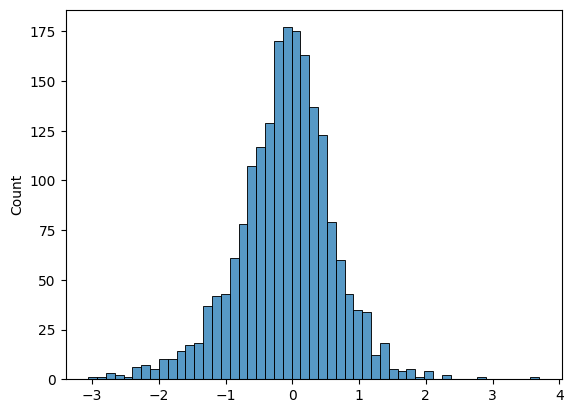

In [9]:
sns.histplot(dt)

print(len(count))
print(len(dt))
print(np.nanmean(dt)*24)
print(np.nanstd(dt)*24)

print(np.nanmean(np.abs(dt))*24)

print(np.nanmin(dt))
print(np.nanmax(dt))

print(np.nanmin(np.abs(dt))*24)
print(np.nanmax(np.abs(dt))*24)

In [44]:
print(np.sort(np.abs(dt))[0:21]*24*60)

[0. 0. 1. 1. 2. 2. 3. 3. 4. 4. 4. 5. 5. 5. 6. 6. 6. 7. 8. 8. 8.]


In [5]:

#!curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001

# 2023-04-21T18:12:00-CME-001


#direct access to specific event

#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001')

#time restriction
#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions ?CMEtimeStart=2024-03-23&CMEtimeEnd=2024-03-26')

#model selection
#os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001&method=CMEFM%20v.0.1')

os.system('curl https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/WS/get/predictions?CMEID=2024-03-23T01:48:00-CME-001&method=ELEvo')


0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

{
  "cmeID" : "2024-03-23T01:48:00-CME-001",
  "observedTime" : "2024-03-23T01:48Z",
  "noArrivalObserved" : false,
  "arrivalTime" : "2024-03-24T14:10Z",
  "maxKP" : 8.0,
  "dstMin" : null,
  "dstMinTime" : null,
  "cmeNote" : "Partial halo to the NW following the front of the earlier 2024-03-23T01:25Z CME, with a faint shock front portion seen to SW in SOHO LASCO C2/C3. There is a data gap in STEREO A COR2 from 2024-03-22T18:23Z to 2024-03-23T03:23Z, after which the end of this event is seen for a few frames before exiting the field of view. A possible source could be the slower developing dimming to the SSW of Active Region 3614 (N25E07) following the deep  northern dimming to the NE of this Active Region. Alternative source could be the concurrent flare from Active Region 3615 (S14E15). Combined arrival of this CME with CME: 2024-03-23T01:25Z was detected at L1 by DSCOVR and ACE at 2024-03-24T14:10Z. The arrival signature is characterized by significant sharp increase in B-total fr

100 22558  100 22558    0     0  34435      0 --:--:-- --:--:-- --:--:-- 34387
